#CUSTOMER SEGMENTATION AND ANALYSIS
In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database, which I downloaded from Kaggle. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. For this, I will be using K-Means Clustering for my project, and we will also try to analyze the data.

This project covers the following topics:

- Reading an Excel file into a Pandas data frame
- Retrieving data from Pandas data frames
- Cleaning and analyzing the data
- Extracting useful information from data
- Clustering of data into segments by using K-Means
- Basic plotting using line and bar charts

#DOWNLOADING THE DATASET
I've downloaded my dataset from Kaggle and uploaded it to the session storage.

[Download the dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/download?datasetVersionNumber=1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Preparation and Cleaning

Now that we have downloaded the dataset, it is time to prepare and clean the data using pandas so that it becomes ready to use and we can gain useful insights from the data


In [ ]:
df=pd.read_excel('marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


We begin the cleaning of our data by removing null values from our dataset.

In [ ]:
#dropping null values
df.dropna(inplace=True)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


As we can see, after removing null values from our dataset, the number of rows decreased from 2240 to 2216

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


We see that the column Dt_Customer contains the date and time of the joining of customer, it should be converted from object type to datetime.

In [ ]:
#Converting the column Dt_Customer to datetime from object as it should be
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

Now we rename the column Dt_Customer to Customer_Enrollment_Date as it would make more sense and increase readability

In [ ]:
df.rename(columns = {'Dt_Customer':'Customer_Enrollment_Date'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2216 non-null   int64         
 1   Year_Birth                2216 non-null   int64         
 2   Education                 2216 non-null   object        
 3   Marital_Status            2216 non-null   object        
 4   Income                    2216 non-null   float64       
 5   Kidhome                   2216 non-null   int64         
 6   Teenhome                  2216 non-null   int64         
 7   Customer_Enrollment_Date  2216 non-null   datetime64[ns]
 8   Recency                   2216 non-null   int64         
 9   MntWines                  2216 non-null   int64         
 10  MntFruits                 2216 non-null   int64         
 11  MntMeatProducts           2216 non-null   int64         
 12  MntFishProducts     

In [ ]:
df.shape

(2216, 29)

We create a list dates, where we store the dates of enrollment of customers and also get the date of the oldest as well as newest customer

In [ ]:
dates=[]
for i in df['Customer_Enrollment_Date']:
  i=i.date()
  dates.append(i)
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


We add a new column in our dataframe called Customer_For_Days, which shows how many days it has been since the enrollment of customer.

In [ ]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For_Days"] = days
df['Customer_For_Days']

0      663 days
1      113 days
2      312 days
3      139 days
4      161 days
         ...   
2235   381 days
2236    19 days
2237   155 days
2238   156 days
2239   622 days
Name: Customer_For_Days, Length: 2216, dtype: timedelta64[ns]

Now since I have the total number of days since enrollment available with us, I would like to convert the column into integer type, showing only number of days since enrollment.

In [ ]:
df['Customer_For_Days']=df['Customer_For_Days'].dt.days
df['Customer_For_Days']

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Customer_For_Days, Length: 2216, dtype: int64

Let's try to get the total categories available in the feature of Martial_Status and Education to gain some more insights.

In [ ]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())
#the function value_counts() returns the number of occurence of each value in the series, along with the value

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


Let's get the age of each customer and add the column in the dataframe.

In [ ]:
df['Age']=2023-df['Year_Birth']
df['Age']
#Adding a new column Age to get the current age of customer

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2216, dtype: int64

Since the customers have purchased various different items, let's get the total amount spent by a customer, and add the respective column in our dataframe.

In [ ]:
#Adding a new column Spent, displaying total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df['Spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2216, dtype: int64

Now let's derive the living situation of the customers according to their martial status.

In [ ]:
#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone",
                                                "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df['Living_With']

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2216, dtype: object

Let's make the education of the customer more clear by segmenting them into different groups.

In [ ]:
#Segmenting education levels in three groups for clarity
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df['Education']

0           Graduate
1           Graduate
2           Graduate
3           Graduate
4       Postgraduate
            ...     
2235        Graduate
2236    Postgraduate
2237        Graduate
2238    Postgraduate
2239    Postgraduate
Name: Education, Length: 2216, dtype: object

Let's derive the total number of children in a household.

In [ ]:
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]
df['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

And at last, let's determine the size of the family.

In [ ]:
#Feature for total members in the household
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]
df['Family_Size']

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64

Now since our **Feature Engineering** is done, we can now drop the columns which are no longer of any use.

In [ ]:
#Dropping columns that are no longer of any use
df.drop(["Marital_Status", "Customer_Enrollment_Date", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'],axis=1,inplace=True)

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For_Days,Age,Spent,Children,Family_Size
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,353.521209,54.179603,607.075361,0.947202,2.592509
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,202.434667,11.985554,602.900476,0.749062,0.905722
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,180.000000,46.000000,69.000000,0.000000,2.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,355.500000,53.000000,396.500000,1.000000,3.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,529.000000,64.000000,1048.000000,1.000000,3.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,699.000000,130.000000,2525.000000,3.000000,5.000000


Let's clean our data by removing outliers.

In [ ]:
#Removing outliers
df = df[(df["Age"]<80)]
df = df[(df["Income"]<250000)]
df.shape

(2204, 22)

We can see that by removing outliers, the number of rows decreased from 2216 to 2204.

Now, we can proceed further with our dataset for Customer Segmentation by using K-Means Clustering. We will cluster our dataset by taking into consideration, two columns: Spent (Total money spent by a customer) and Income (Total income of a customer). I will create a separate dataset for that which will include only those two columns.

In [ ]:
df2=df[['Spent','Income']].copy()

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit_predict(df2)
  wcss.append(km.inertia_)

wcss

[1022286022845.3896,
 317727142526.8668,
 182691457994.763,
 121969529339.25352,
 80620585735.2701,
 53336778201.26228,
 39890563829.29661,
 30958507873.935448,
 23813196720.30758,
 18958342795.79875]

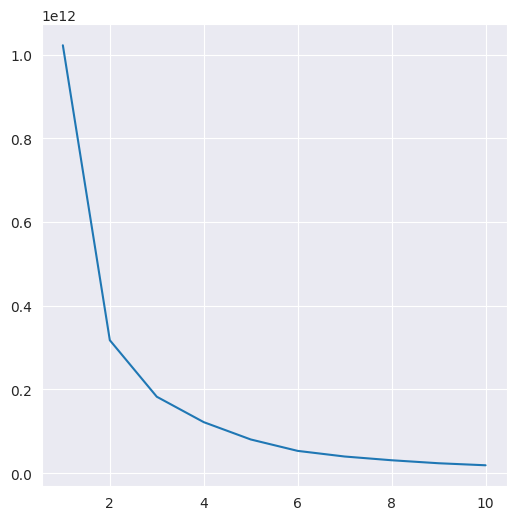

In [ ]:
plt.plot(range(1,11),wcss)
plt.show()

Here, we can see from the graph that the number of clusters needed are not exactly clear due to the variation in the dataset. Thus, we need to scale the dataset, and cluster that dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler

dfcpy=df.copy() #Creating a copy of dataframe

#Dropping columns not containing numerical values
dfcpy.drop(['Living_With','Education'],axis=1,inplace=True)
scaler = StandardScaler()
scaler.fit(dfcpy)
scaled_df = pd.DataFrame(scaler.transform(dfcpy),columns= dfcpy.columns)

In [ ]:
scaled_df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For_Days,Age,Spent,Children,Family_Size
0,0.289185,-0.825260,-0.932849,0.312269,0.983966,1.549100,1.693308,2.463290,1.481754,0.849985,0.348643,1.429448,2.514695,-0.554429,0.690032,1.526165,1.034452,1.681199,-1.270584,-1.766768
1,-0.258651,1.036432,0.904505,-0.378389,-0.870843,-0.637261,-0.716537,-0.648566,-0.633691,-0.733980,-0.170552,-1.123930,-0.568978,-1.170338,-0.134713,-1.187696,1.292849,-0.961206,1.401522,0.445079
2,0.915103,-0.825260,-0.932849,-0.792783,0.362724,0.569007,-0.176553,1.346683,-0.147382,-0.038581,-0.689748,1.429448,-0.226347,1.293296,-0.547086,-0.205772,0.345390,0.283550,-1.270584,-0.660845
3,-1.173630,1.036432,-0.932849,-0.792783,-0.870843,-0.561869,-0.654059,-0.502126,-0.585060,-0.753296,-0.170552,-0.759162,-0.911608,-0.554429,0.277659,-1.059404,-1.291130,-0.917997,0.065469,0.445079
4,0.296384,1.036432,-0.932849,1.555452,-0.389306,0.418223,-0.216717,0.156855,-0.001489,-0.560130,1.387034,0.335143,0.116283,0.061479,-0.134713,-0.950850,-1.032732,-0.304759,0.065469,0.445079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,0.432484,-0.825260,0.904505,-0.102126,1.203928,0.418223,0.068894,0.083635,2.211217,3.921330,-0.170552,1.794217,0.116283,-0.554429,-0.134713,0.134695,0.173125,1.222518,0.065469,0.445079
2200,0.562127,2.898123,0.904505,0.243203,0.303275,-0.662391,-0.609432,-0.685177,-0.658007,-0.695346,2.425425,1.429448,-0.226347,-0.246475,0.690032,-1.651519,1.981911,-0.268198,2.737575,2.656927
2201,0.235442,-0.825260,-0.932849,1.451854,1.795446,0.543876,0.225088,-0.099415,-0.366221,-0.386280,-0.689748,-0.759162,0.116283,2.217159,0.277659,-0.980455,-1.032732,1.056329,-1.270584,-1.766768
2202,0.805109,-0.825260,0.904505,-1.414375,0.368669,0.091526,0.211700,0.779227,0.071457,0.328435,-0.170552,0.699912,0.801543,1.293296,-0.959459,-0.975521,1.120584,0.394896,0.065469,0.445079


Now, we can see that our dataset is scaled. We will use this dataset to perform K-Means clustering.

In [ ]:
scaled_df2=scaled_df[['Spent','Income']].copy()

wcss=[]
for i in range(1,6):
  km=KMeans(n_clusters=i)
  km.fit_predict(scaled_df2)
  wcss.append(km.inertia_)

wcss

[4408.000000000001,
 1400.5344701743402,
 920.5165562843495,
 668.0243771868027,
 558.7044552277787]

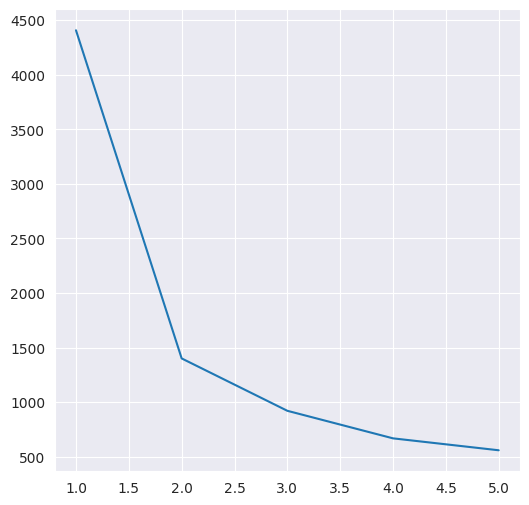

In [ ]:
plt.plot(range(1,6),wcss)
plt.show()

Here if we look carefully, we can see that after reaching the elbow point of 4, the slope has been decreased and is constant afterwards. This signifies that the number of clusters formed could be 4.  

In [ ]:
X=df2.iloc[:,:].values
km=KMeans(n_clusters=4)
y_means=km.fit_predict(X)
y_means

array([2, 0, 2, ..., 2, 2, 2], dtype=int32)

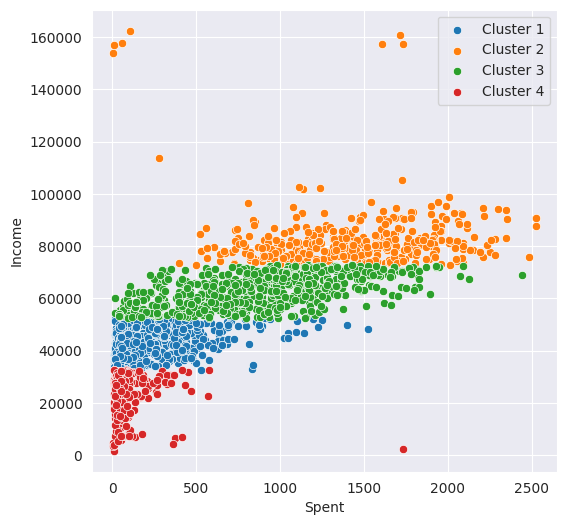

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
legend_scatter=True
sns.scatterplot(x=X[y_means== 0, 0],y=X[y_means== 0,1],data=X)
sns.scatterplot(x=X[y_means== 1, 0],y=X[y_means== 1,1],data=X)
sns.scatterplot(x=X[y_means== 2, 0],y=X[y_means== 2,1],data=X)
sns.scatterplot(x=X[y_means== 3, 0],y=X[y_means== 3,1],data=X)
plt.legend(['Cluster 1','Cluster 2','Cluster 3','Cluster 4'], loc=0, frameon=legend_scatter)
plt.xlabel("Spent")
plt.ylabel("Income")
plt.show()

Here as we have plotted the scatterplot and the clusters are visible to us, we can classify each cluster now on the basis of their characteristics.

**Cluster 1** represents customers with low spending and average income

**Cluster 2** represents customers with high spending and high income

**Cluster 3** represents people with low spending and low income

**Cluster 4** represents customers with average spending and high income

#Conclusion: The customers could be divided into 4 groups, considering their income and the amount they spend in the company.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2204 non-null   object 
 1   Income               2204 non-null   float64
 2   Kidhome              2204 non-null   int64  
 3   Teenhome             2204 non-null   int64  
 4   Recency              2204 non-null   int64  
 5   MntWines             2204 non-null   int64  
 6   MntFruits            2204 non-null   int64  
 7   MntMeatProducts      2204 non-null   int64  
 8   MntFishProducts      2204 non-null   int64  
 9   MntSweetProducts     2204 non-null   int64  
 10  MntGoldProds         2204 non-null   int64  
 11  NumDealsPurchases    2204 non-null   int64  
 12  NumWebPurchases      2204 non-null   int64  
 13  NumCatalogPurchases  2204 non-null   int64  
 14  NumStorePurchases    2204 non-null   int64  
 15  NumWebVisitsMonth    2204 non-null   i

We can also do some further analysis from our dataset. We can plot a histogram of the age of customers to extract some insights from it.

<Axes: xlabel='Age', ylabel='Count'>

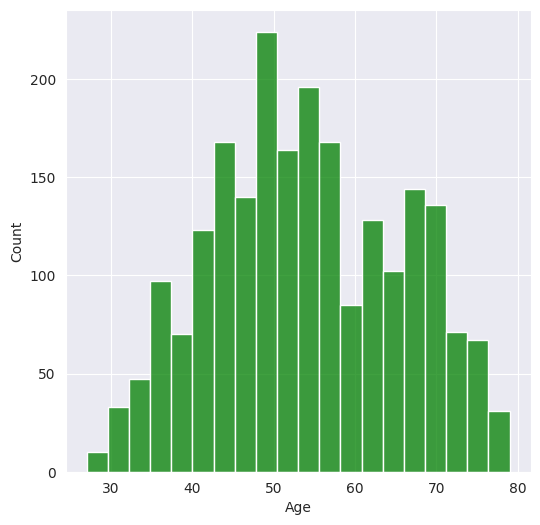

In [ ]:
sns.histplot(df.Age,color='green')

#Conclusion: We can find that most of the customers are from 50 to 60 years old.

We can plot a simple barplot comparing the age of the customer to the number of days since the customer has been enrolled.

<Axes: xlabel='Age', ylabel='Customer_For_Days'>

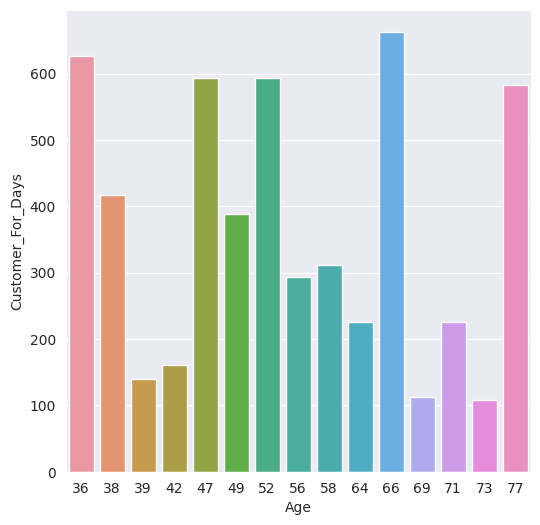

In [ ]:
sns.barplot(x=df.Age.head(15),y=df.Customer_For_Days.head(15))

We can plot a scatter plot, showing the average amount spent by a customer from the time of enrollment, based on the family size of the customer.

<Axes: xlabel='Customer_For_Days', ylabel='Spent'>

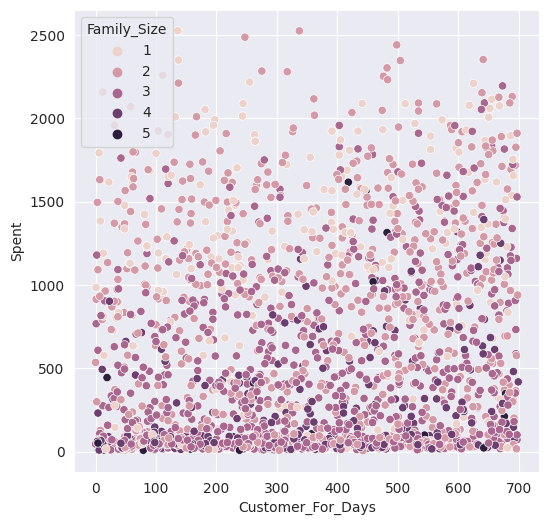

In [ ]:
sns.scatterplot(x=df.Customer_For_Days,y=df.Spent,hue=df.Family_Size)

Now let's save our work by pressing Ctrl+S

##CONCLUSION


#In this project, I performed unsupervised learning technique, K-Means Clustering. I came up with 4 clusters and further used them in classifying customers in 4 groups according to their spending and income. Further on, I analyzed the data to gain some more useful insights from it.

## References and Future Work

You can find the links to the resources that I found useful during the execution of this project and learn more about the tools and libraries used in it.


*   Kaggle Dataset:https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/download?datasetVersionNumber=1
*   Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
*   Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
*   Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
*   opendatasets Python library: https://github.com/JovianML/opendatasets
*   K-Means Clustering documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
